<a href="https://colab.research.google.com/github/namepen/test_Repo/blob/master/batch_norm_excode.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



## Batch Normalization Example Code

Batch Normalization을 적용했을 떄 모델의 학습 성능을 비교해 보자.



### Set up

In [1]:
import tensorflow as tf
import numpy as np
from tensorflow import keras

from keras.callbacks import ReduceLROnPlateau
from keras.preprocessing.image import ImageDataGenerator
from keras.optimizers import RMSprop, Adam
from keras import Sequential
from keras.layers import Conv2D, MaxPool2D, Dropout, Flatten, Dense, BatchNormalization, Activation

import matplotlib.pyplot as plt
import time

print(tf.__version__)
print(keras.__version__)

1.12.0
2.1.6-tf


Using TensorFlow backend.


### Load the dataset

fashion mnist dataset을 이용해서 모델을 학습시켜볼 것이다.

In [2]:
(x_train , y_train), (x_test, y_test) = keras.datasets.fashion_mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


In [3]:
x_train.shape

(60000, 28, 28)

###Data preprocessing

In [0]:
x_train = x_train.reshape(-1,28,28,1)/255
x_test = x_test.reshape(-1,28,28,1)/255

y_train = keras.utils.to_categorical(y_train, num_classes=10)
y_test = keras.utils.to_categorical(y_test, num_classes=10)

In [0]:
from sklearn.model_selection import train_test_split

In [0]:
random_seed = 222

In [0]:
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.1, random_state=random_seed)

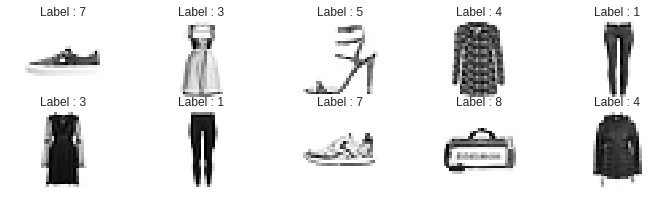

In [8]:
def plot_image(x):
    plt.figure(figsize=(12,8))
    
    for ax in range(10):
        plt.subplot(5,5,ax+1)
        plt.imshow(x[ax,:,:,0])
        plt.title("Label : {}".format(np.argmax(y_train[ax])))
        plt.axis('off')
        
plot_image(x_train)

 ## Data argumentation
 
 keras.preprocessing.ImageDataGenerator을 사용해서 간단한 Argumentation을 적용해볼 것이다.
 
 
 * shear_range : 밀림 강도 범위내에서 임의로 원본이미지를 변형시킵니다. 수치는 시계반대방향으로 밀림 강도를 라디안으로 나타냅니다. 
 
 * zoom_range : 이미지를 범위내에서 확대/축소 변형시킵니다.
 
 * horizontal_flip : 이미지를 좌우 반전 시킵니다.

In [0]:
datagen = ImageDataGenerator(shear_range=0.2, zoom_range=0.2, horizontal_flip=True)

datagen.fit(x_train)

train_generator = datagen.flow(x_train, y_train, batch_size= 128)

### Create CNN model

간단한 CNN model을 구성하며, keras의 Sequential API를 이용할 것이다.

In [0]:
def MyModel(bn = True, activation="sigmoid"):
    model = Sequential()
    
    model.add(Conv2D(64, 3, padding="same", input_shape=(x_train.shape[1:])))
    if bn:
        model.add(BatchNormalization())
    model.add(Activation(activation))
    
    #first block
    model.add(Conv2D(64, 3, padding="same"))
    if bn:
        model.add(BatchNormalization())
    model.add(Activation(activation))
    
    model.add(Conv2D(64, 3, padding="same"))
    if bn:
        model.add(BatchNormalization())
    model.add(Activation(activation))
    
    model.add(MaxPool2D())
    model.add(Dropout(0.15))
    
    #Second block
    model.add(Conv2D(64, 3, padding="same"))
    if bn:
        model.add(BatchNormalization())
    model.add(Activation(activation))
    
    model.add(Conv2D(64, 3, padding="same"))
    if bn:
        model.add(BatchNormalization())
    model.add(Activation(activation))
    
    model.add(MaxPool2D())
    model.add(Dropout(0.15))
    
    #Dense layer
    model.add(Flatten())
    model.add(Dense(10, activation = "softmax"))
    
    return model

In [0]:
def compile_model(model, optimizer='rmsprop', loss='categorical_crossentropy'):
    model.compile(optimizer=optimizer, loss=loss, metrics=['accuracy'])
    
    return model

### 4 difference model

Activation을 sigmoid와 relu 두 가지로 나누며, Batch Normalization을 적용한것과 안한 모델을 비교할 것이다.

In [0]:
#COMPILING THE 4 MODELS
sigmoid_without_bn = MyModel(bn=False, activation="sigmoid")
sigmoid_without_bn = compile_model(sigmoid_without_bn)

sigmoid_with_bn = MyModel(bn=True, activation="sigmoid")
sigmoid_with_bn = compile_model(sigmoid_with_bn)

relu_without_bn = MyModel(bn=False, activation="relu")
relu_without_bn = compile_model(relu_without_bn)

relu_with_bn = MyModel(bn=True, activation="relu")
relu_with_bn = compile_model(relu_with_bn)

### Training Models

In [0]:
batch_size = 128

In [14]:
hist_1 = sigmoid_without_bn.fit_generator(train_generator, epochs=20,  #batch_size 는 윙
                                 steps_per_epoch=x_train.shape[0]/ batch_size,
                                  verbose=1)


hist_2 = sigmoid_with_bn.fit_generator(train_generator, epochs=20,  #batch_size 는 윙
                                 steps_per_epoch=x_train.shape[0]/ batch_size,
                                  verbose=1)

hist_3 = relu_without_bn.fit_generator(train_generator, epochs=20,  #batch_size 는 윙
                                 steps_per_epoch=x_train.shape[0]/ batch_size,
                                  verbose=1)

hist_4 = relu_with_bn.fit_generator(train_generator, epochs=20,  #batch_size 는 윙
                                 steps_per_epoch=x_train.shape[0]/ batch_size,
                                  verbose=1)

Epoch 1/20
422/421 [==============================] - 21s 49ms/step - loss: 2.3191 - acc: 0.0979
Epoch 2/20
422/421 [==============================] - 17s 40ms/step - loss: 2.3027 - acc: 0.0986
Epoch 3/20
422/421 [==============================] - 17s 40ms/step - loss: 2.3027 - acc: 0.0975
Epoch 4/20
422/421 [==============================] - 17s 40ms/step - loss: 2.3027 - acc: 0.0988
Epoch 5/20
422/421 [==============================] - 17s 40ms/step - loss: 2.3027 - acc: 0.0979
Epoch 6/20
422/421 [==============================] - 17s 40ms/step - loss: 2.3027 - acc: 0.0990
Epoch 7/20
422/421 [==============================] - 17s 40ms/step - loss: 2.3027 - acc: 0.0986
Epoch 8/20
422/421 [==============================] - 17s 40ms/step - loss: 2.3027 - acc: 0.0973
Epoch 9/20
422/421 [==============================] - 17s 40ms/step - loss: 2.3027 - acc: 0.0985
Epoch 10/20
422/421 [==============================] - 17s 40ms/step - loss: 2.3027 - acc: 0.0971
Epoch 11/20
422/421 [========

### Plot Conclusion

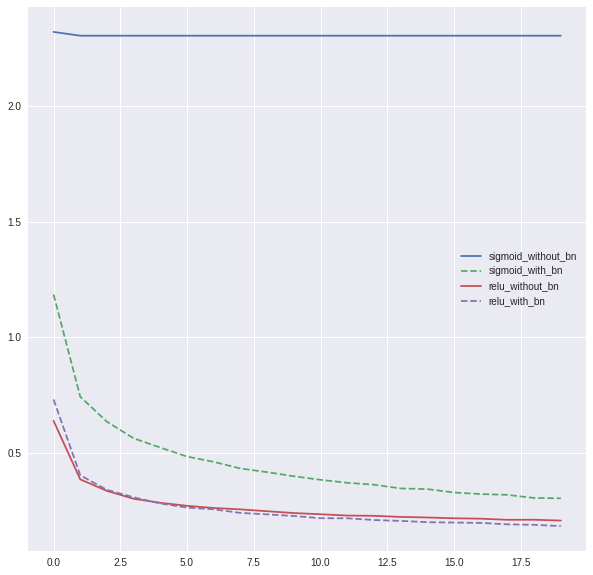

In [29]:
def plot_hist(option='loss'):
  plt.figure(figsize=(10,10))
  plt.plot(hist_1.history[option], label='sigmoid_without_bn')
  plt.plot(hist_2.history[option],'--', label='sigmoid_with_bn')
  plt.plot(hist_3.history[option], label='relu_without_bn')
  plt.plot(hist_4.history[option],'--',label='relu_with_bn')
  plt.legend()
  plt.show()
  
plot_hist('loss')

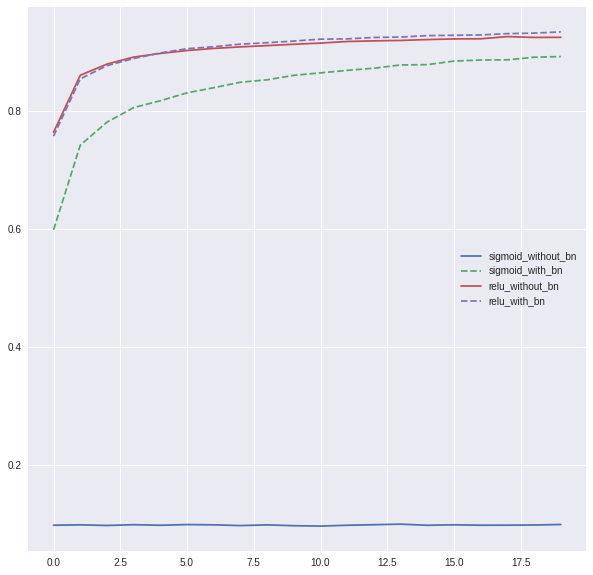

In [30]:
plot_hist('acc')

위 그래프를 살펴보면, BN을 적용하지 않고 sigmoid만 사용한 경우, loss와 acc의 변화가 거의 없는 것으로 보아 학습이 거의 이루어지지 않는 상태에 빠졌다고 볼 수 있다. BN을 적용하면 확실하게 loss가 감소하면서 학습이 잘 이루어지는 현상을 볼 수 있다.

Relu를 적용했을 때는 BN없이도 학습이 잘 진행되지만, BN을 적용했을 때 더 좋은 결과를 보여주는 것을 확인 할 수 있다. 